### 002832 比音勒芬
##### 加权平均净资产收益率

| 2019 | 2018 | 2017 |
| ---- | ---- | ---- |
| 22.86% | 19.14% | 13.24% |

##### 2020-12-23
* 没有接待投资者记录
* 存货？

In [12]:
ticker = '002832'

In [13]:
%%html
<style>
table {float:left}
</style>

In [14]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import baostock

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils
import script.bsutil as bu
from script.figure import draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
baostock.login()
code = bu.get_bs_code(ticker)
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = bu.get_price_daily(code)
bs = data.get_BS(ticker)
baostock.logout()

login success!
logout success!


In [16]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,1.32,1.32,"1,825,516,845 ( 23.7%)","1,341,695,561 ( 17.5%)","406,606,998 ( 39.1%)"
2018-12-31,0.95,0.95,"1,475,747,149 ( 40.0%)","1,141,407,620 ( 36.9%)","292,257,418 ( 62.2%)"
2017-12-31,0.99,0.99,"1,054,428,156 ( 25.2%)","833,569,501 ( 24.4%)","180,223,955 ( 35.9%)"
2016-12-31,1.66,1.66,"842,007,435 ( 11.7%)","670,080,781 ( 13.5%)","132,596,382 ( 7.6%)"
2015-12-31,1.54,1.54,"753,613,908 ( 16.0%)","590,398,665 ( 16.3%)","123,190,162 ( 14.6%)"
2014-12-31,NaN,NaN,"649,682,653 ( 14.5%)","507,548,483 ( 15.1%)","107,504,630 ( 12.1%)"
2013-12-31,NaN,NaN,"567,276,092 ( nan%)","440,914,394 ( nan%)","95,875,608 ( nan%)"


In [17]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-09-30,"610,306,613 ( 27.7%)","187,374,642 ( 36.4%)"
2020-06-30,"399,990,232 ( 7.0%)","64,213,959 ( 45.9%)"
2020-03-31,"366,386,392 (-22.3%)","97,063,358 (-25.3%)"
2019-12-31,"502,133,621 ( 20.5%)","95,331,744 ( 10.5%)"
2019-09-30,"477,877,182 ( 24.6%)","137,392,821 ( 64.4%)"
2019-06-30,"373,715,972 ( 22.4%)","44,000,124 ( 17.3%)"
2019-03-31,"471,790,070 ( 27.4%)","129,882,309 ( 52.9%)"
2018-12-31,"416,598,026 ( 40.6%)","86,241,282 (100.8%)"
2018-09-30,"383,536,942 ( 45.7%)","83,569,227 ( 56.7%)"


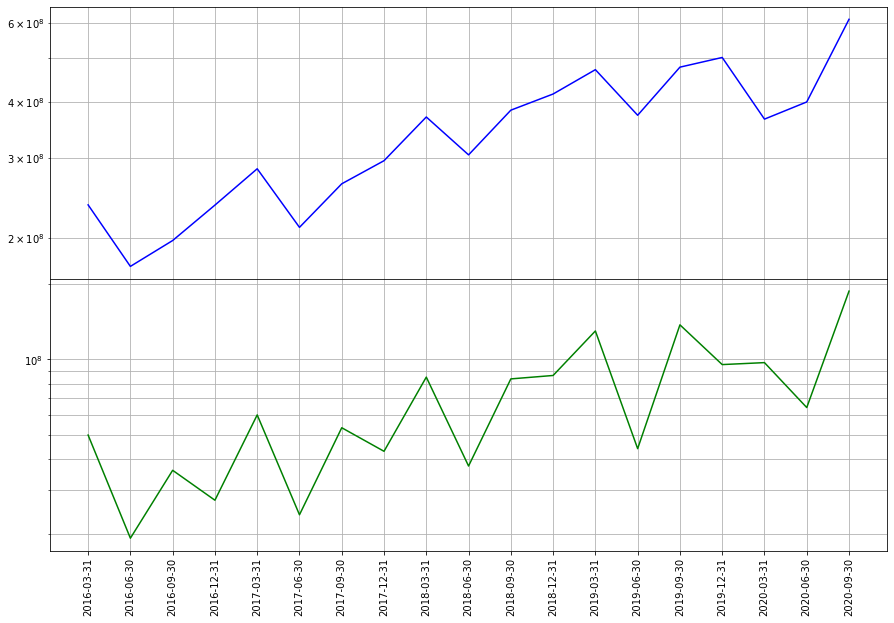

In [18]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [19]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,67.8,22.3
2018-12-31,63.3,19.8
2017-12-31,65.4,17.1
2016-12-31,62.3,15.7
2015-12-31,62.7,16.3
2014-12-31,62.1,16.5
2013-12-31,61.1,16.9


In [20]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"1,825,516,845 ( 23.7%)","674,332,467 ( 8.3%)","86,737,494 ( 38.2%)","140,836,228 ( 34.9%)"
2018-12-31,"1,475,747,149 ( 40.0%)","622,374,870 ( 78.4%)","62,766,791 (111.5%)","104,377,363 ( 94.3%)"
2017-12-31,"1,054,428,156 ( 25.2%)","348,853,519 ( 41.1%)","29,683,917 ( -2.1%)","53,711,659 ( 11.6%)"
2016-12-31,"842,007,435 ( 11.7%)","247,229,936 ( 27.8%)","30,311,874 ( 36.3%)","48,116,420 ( 16.3%)"
2015-12-31,"753,613,908 ( 16.0%)","193,407,251 ( 15.1%)","22,237,364 ( 13.2%)","41,380,586 ( 23.4%)"
2014-12-31,"649,682,653 ( 14.5%)","167,969,709 ( 5.3%)","19,646,396 ( 72.4%)","33,533,686 ( 26.9%)"
2013-12-31,"567,276,092 ( nan%)","159,455,934 ( nan%)","11,396,702 ( nan%)","26,425,783 ( nan%)"


In [21]:
mkt['前复权'] = mkt['close'].round(2)
mkt['滚动市盈率'] = mkt['peTTM'].round(1)
mkt['交易日期'] = pd.to_datetime(mkt['date'])
df = mkt[['前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])


前复权        滚动市盈率       前复权增长
      first   last   min   max      
交易日期                                
2016   7.28  11.73  32.6  52.6  61.1
2017  12.43  11.68  35.3  55.7  -6.0
2018  11.76  11.17  20.3  39.3  -5.0
2019  10.68  14.93  18.3  31.2  39.8
2020  14.90  15.86  13.7  27.6   6.4

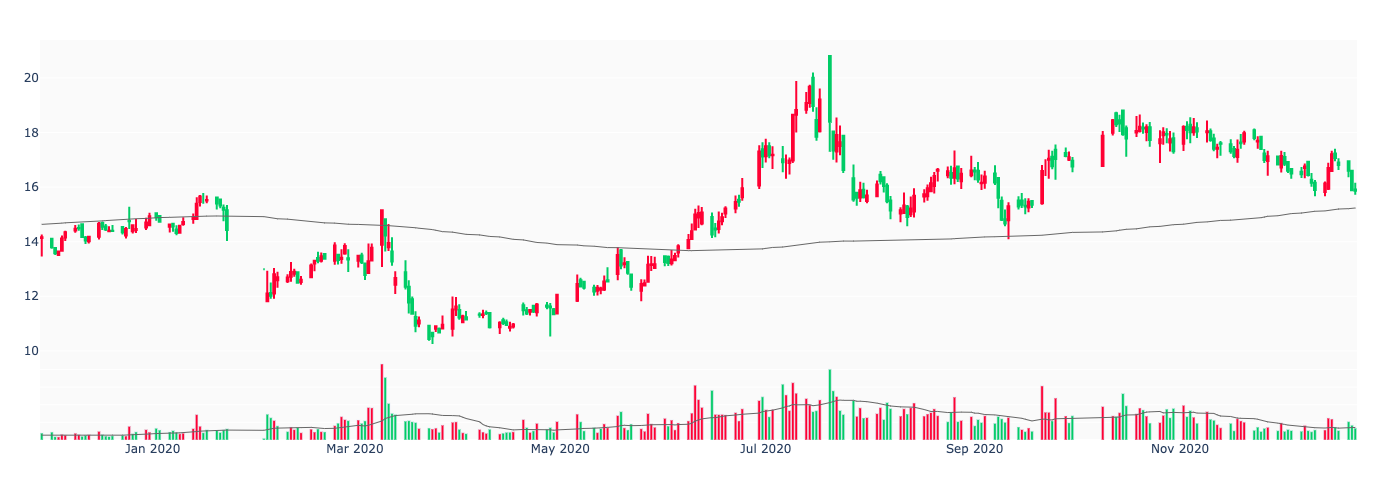

In [22]:
draw(mkt, 260, 200, 20)